# EDA

In [1]:
# Libraries etc
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


In [2]:
#dataframe from cleaned pickle
df = pd.read_pickle(os.path.join('data', 'cleaned_df.pkl'))

In [3]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
administrative             12205 non-null int64
administrative_duration    12205 non-null float64
informational              12205 non-null int64
informational_duration     12205 non-null float64
productrelated             12205 non-null int64
productrelated_duration    12205 non-null float64
bouncerates                12205 non-null float64
exitrates                  12205 non-null float64
pagevalues                 12205 non-null float64
specialday                 12205 non-null float64
month                      12205 non-null category
operatingsystems           12205 non-null category
browser                    12205 non-null category
region                     12205 non-null category
traffictype                12205 non-null category
visitortype                12205 non-null category
weekend                    12205 non-null category
revenue                    12205 non-nul

In [4]:
df.describe(exclude='category').T

,count,mean,std,min,25%,50%,75%,max
administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
administrative_duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
informational_duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
productrelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
productrelated_duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
bouncerates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
exitrates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
pagevalues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
specialday,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


Continuous feats seems to have outliers and right skewness in all cases

In [5]:
df.describe(include='category').T

,count,unique,top,freq
month,12205,10,May,3329
operatingsystems,12205,8,2,6541
browser,12205,13,2,7883
region,12205,9,1,4714
traffictype,12205,20,2,3911
visitortype,12205,3,Returning_Visitor,10431
weekend,12205,2,False,9346
revenue,12205,2,False,10297


There's also class imbalance happening in most variables

In [6]:
for col in df.columns:
    print(df[col].value_counts(), '\n', '='*60)

0     5643
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: administrative, dtype: int64 
0.000000      5778
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: administrative_duration, Length: 3335, dtype: int64 
0     9574
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: informational, dtype: int64 
0.0      9800
9.0        33
6.0        26
10.0       26
7.0        26
         ... 
291.5       1
43.2        1
338.4       1
86.6        1
145.6       1
Name: informational_dur

## Initial findings:  
**informational**: Mainly *0*  
**productrelated**: Mainly *0*  
**productrelated_duration**: Mainly *0*  
**exitrates**: Mainly *0*  
**pagevalues**: Mainly *0*  
**month**: Top 5 months: *May*, *Nov*, *Mar*, *Dec*, *Oct* - Least month: *Feb*  

- seems that *Jan* and *Apr* are missing ¯\_(ツ)_/¯  


**operatingsystems**:  Top 2 categories: *2*, *1* (Maybe mac and windows, no assumptions)  
**browser**:  Top 5 categories: *1*, *3*, *4*, *2*, *6*  
**traffictype**: Top 5 categories : *2*, *1*, *3*, *4*, *13*  
**visitortype**: Mainly *Returning_Visitor*  
**weekend**: Mainly *False* 
**revenue**: Mainly *False*  


## Distribution of the cont. feats  
Seems that all continuous variables have right skewed distribution
Since we're doing clustering, we wouldn't need to do transformation in the initial models:  

Yet the since the DS approach is an iterative process, later transformation methods and specifically **logarithmic transofrmation** ☜(ﾟヮﾟ☜) in the case of right skewed data can benefit the final clustering/classification.

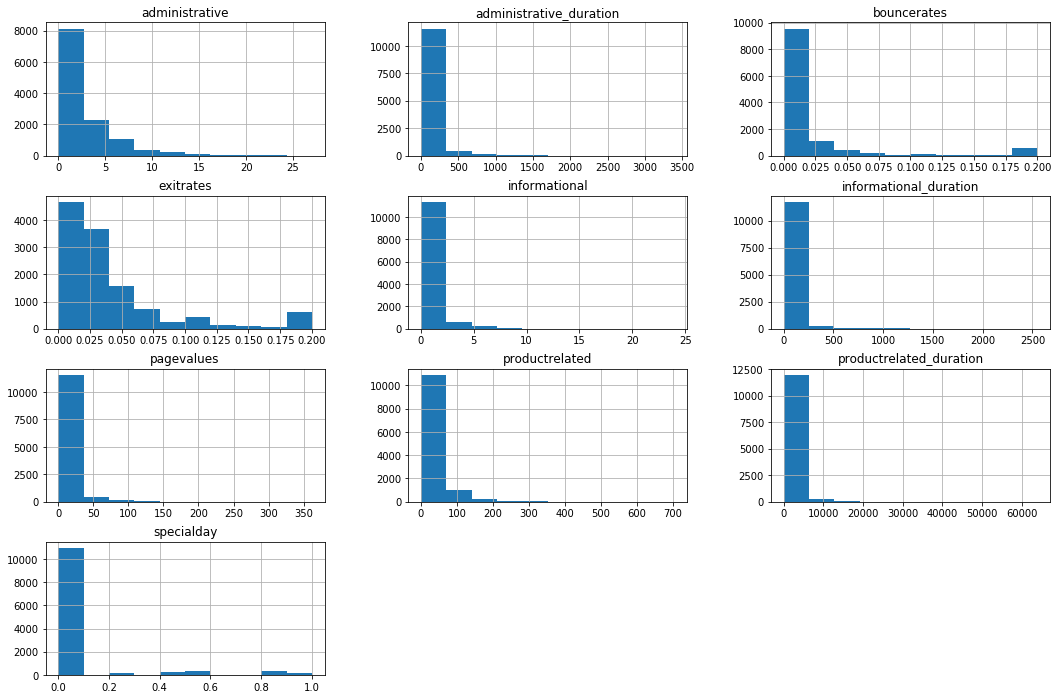

In [7]:
df.hist(figsize=(18,12));

## Categorical Variable countplots

In [8]:
len(df.select_dtypes('category').columns)
#4*2 = 8, so suplots are 4*2

8

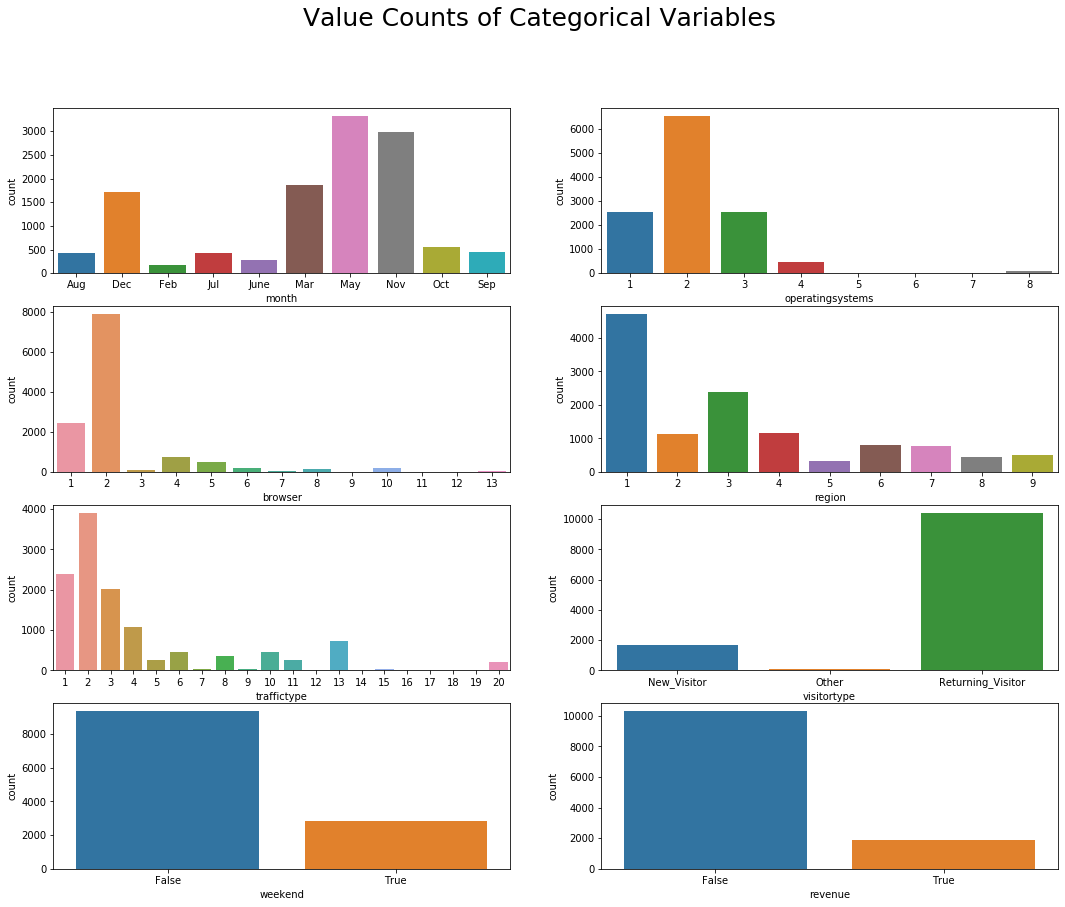

In [9]:
plt.rcParams['figure.figsize'] = (18, 14)
for i, col in enumerate(df.select_dtypes('category').columns):
    plt.subplot(4,2,i+1)
    sns.countplot(df[col])
    i+=1
plt.suptitle('Value Counts of Categorical Variables', size=25);


# Onehot and Label Encoding

In [10]:
#data is missing jan and apr, but since the model can be generalized to new predictions later, we add them to label encoding dic
month_dic = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [11]:
df.month = df.month.map(month_dic)

In [12]:
df.weekend = df.weekend.map({True:1, False:0})

In [13]:
df.revenue = df.revenue.map({True:1, False:0})

In [14]:
ohe_cols = ['operatingsystems', 'browser', 'region', 'traffictype', 'visitortype']
#one hot encoding the columns, joining to the rest of the columns and dropping the non encoded variables
ohe_df = pd.concat([df.drop(ohe_cols, axis=1), pd.get_dummies(df[ohe_cols])], axis=1)

In [15]:
ohe_df.sample(20)

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,weekend,revenue,operatingsystems_1,operatingsystems_2,operatingsystems_3,operatingsystems_4,operatingsystems_5,operatingsystems_6,operatingsystems_7,operatingsystems_8,browser_1,browser_2,browser_3,browser_4,browser_5,browser_6,browser_7,browser_8,browser_9,browser_10,browser_11,browser_12,browser_13,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,traffictype_1,traffictype_2,traffictype_3,traffictype_4,traffictype_5,traffictype_6,traffictype_7,traffictype_8,traffictype_9,traffictype_10,traffictype_11,traffictype_12,traffictype_13,traffictype_14,traffictype_15,traffictype_16,traffictype_17,traffictype_18,traffictype_19,traffictype_20,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor
7573,7,253.400000,0,0.0,12,832.700000,0.000000,0.004762,0.000000,0.0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2852,0,0.000000,0,0.0,7,117.000000,0.000000,0.028571,0.000000,0.0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6436,3,23.200000,0,0.0,24,809.433333,0.012800,0.021333,0.000000,0.0,8,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8215,0,0.000000,0,0.0,6,129.500000,0.000000,0.033333,0.000000,0.0,12,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7973,4,77.600000,0,0.0,39,1477.154762,0.038158,0.073977,0.775318,0.0,11,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9244,0,0.000000,0,0.0,27,857.183333,0.000000,0.017284,0.000000,0.0,11,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2152,2,37.000000,1,18.0,25,430.500000,0.000000,0.007143,0.000000,0.0,5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7642,0,0.000000,0,0.0,7,0.000000,0.200000,0.200000,0.000000,0.0,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3960,0,0.000000,0,0.0,10,240.500000,0.000000,0.022222,0.000000,0.0,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9341,2,12.625000,3,95.0,29,1268.125000,0.008333,0.038000,25.044418,0.0,11,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
if os.path.exists('data'):
    pass
else:
    os.mkdir('data')
ohe_df.to_pickle(os.path.join('data', 'ohe_df.pkl'))